<a href="https://colab.research.google.com/github/Arpitsinghvampire/computer_vision/blob/main/Denoising_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#here we import  the dependencies
import numpy as np
import tensorflow as tf
from keras.datasets import mnist


In [2]:
#now we differentiate the data into train and the test set
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#here the data is loaded
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


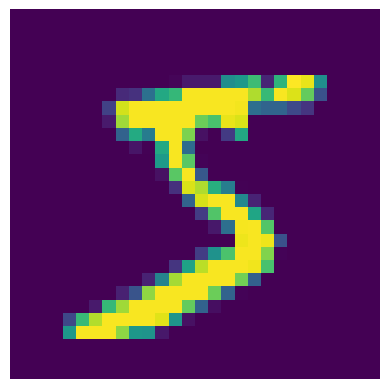

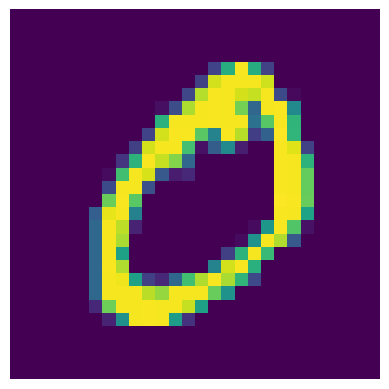

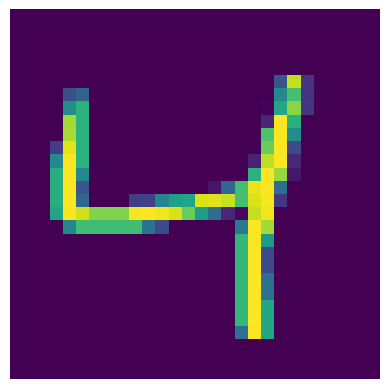

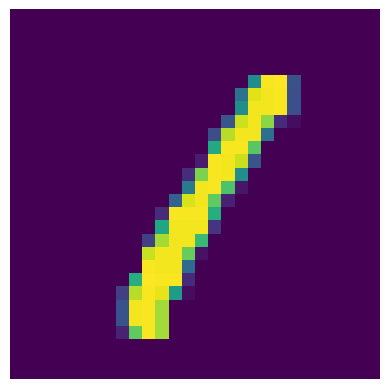

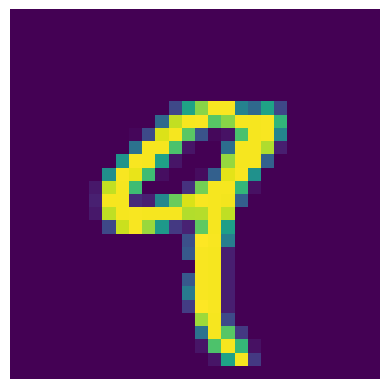

In [3]:
#now lets plot some results
import matplotlib.pyplot as plt
for i in range(5):
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.plot()
  plt.show()

In [4]:
#now lets normalize the image
x_train=x_train/255.0

x_test=x_test/255.0



In [5]:
#now lets add the noise to the data
#here we want to add the noise'
#the noise is the gaussian distribution

noise_factor=0.3

x_train_noise=x_train+noise_factor*np.random.normal(loc=0,scale=1,size=x_train.shape)
x_test_noise=x_test+noise_factor*np.random.normal(loc=0,scale=1,size=x_test.shape)


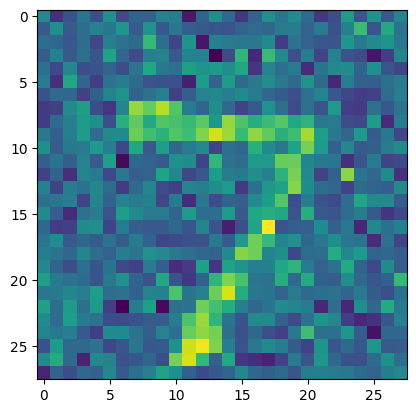

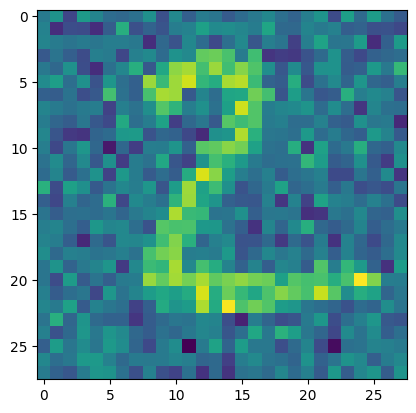

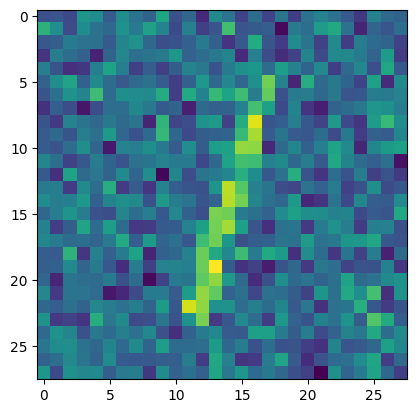

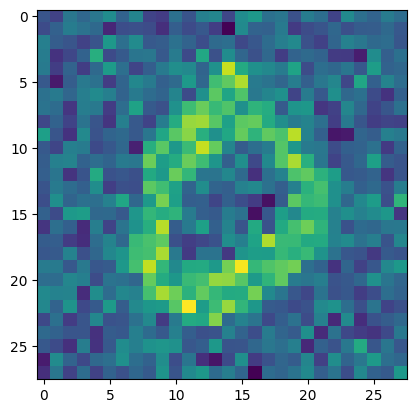

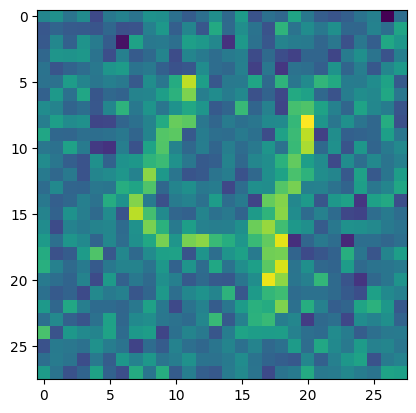

In [6]:
#here in the above code block we have added the gaussian noise
#now lets plot the test data with the gaussian noise
import matplotlib.pyplot as plt

for i in range(5):
  plt.imshow(x_test_noise[i])
  plt.show()

In [7]:
#now lets define our denoising  autoencoder

#the denoising autoencoder has the noisy data in the input
#and clean data in the output
#this would train the model
#here we import the necessay dependencies :
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import * #import everything from keras .layers
from keras.utils import plot_model
from keras.models import Model


In [12]:
#now here we define the model
input=Input((28,28))
flatten_layer=Flatten()(input)
dense_layer1=Dense(576,activation='relu')(flatten_layer)
dense_layer2=Dense(512,activation='relu')(dense_layer1)
dense_layer3=Dense(256,activation='relu')(dense_layer2)
dense_layer4=Dense(256,activation='relu')(dense_layer3)
dense_layer5=Dense(128,activation='relu')(dense_layer4)
dense_layer6=Dense(64,activation='relu')(dense_layer5)
dense_layer7=Dense(32,activation='relu')(dense_layer6)
dense_layer8=Dense(16,activation='relu')(dense_layer7) #this is the bottleneck layer
#from here we start the decoding layer

dense_layer9=Dense(32,activation='relu')(dense_layer8)
dense_layer10=Dense(64,activation='relu')(dense_layer9)
dense_layer11=Dense(128,activation='relu')(dense_layer10)
dense_layer12=Dense(256,activation='relu')(dense_layer11)
dense_layer13=Dense(256,activation='relu')(dense_layer12)
dense_layer14=Dense(512,activation='relu')(dense_layer13)
dense_layer15=Dense(576,activation='relu')(dense_layer14)

dense_layer16=Dense(784,activation='relu')(dense_layer15)
#now we need to reshape the image
reshaped_image=Reshape(target_shape=(28,28))(dense_layer16)


In [13]:
#now lets wrap the above model
den_autoencoder=Model(inputs=input,outputs=reshaped_image)

In [15]:
#now lets see the sumary of the above model
den_autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 576)               452160    
                                                                 
 dense_34 (Dense)            (None, 512)               295424    
                                                                 
 dense_35 (Dense)            (None, 256)               131328    
                                                                 
 dense_36 (Dense)            (None, 256)               65792     
                                                                 
 dense_37 (Dense)            (None, 128)               3289

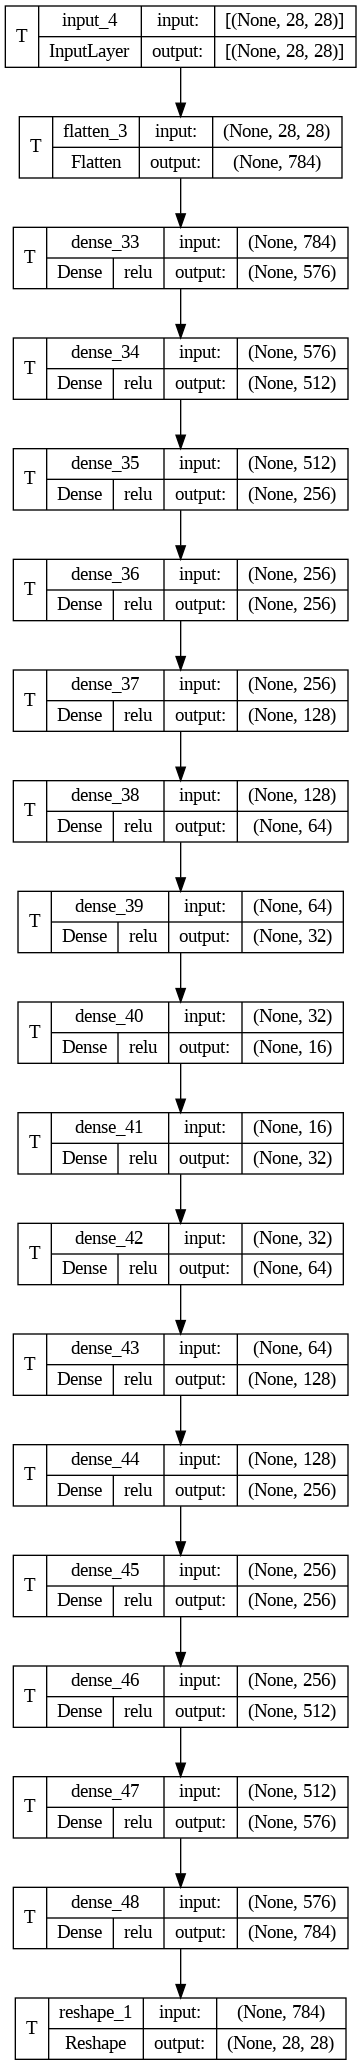

In [16]:
#now lets plot the model
plot_model(den_autoencoder,show_layer_names=True,show_shapes=True,show_layer_activations=True,show_trainable=True)

In [17]:
#now lets compile the model
den_autoencoder.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
#now lets fit the train and the test set to the model
history=den_autoencoder.fit(x_train_noise,x_train,batch_size=100,epochs=10,verbose=1)


Epoch 1/10
600/600 [==============================] - 35s 51ms/step - loss: 0.4850 - accuracy: 0.2152
Epoch 2/10
600/600 [==============================] - 28s 47ms/step - loss: 0.3730 - accuracy: 0.2752
Epoch 3/10
600/600 [==============================] - 28s 47ms/step - loss: 0.3516 - accuracy: 0.2698
Epoch 4/10
600/600 [==============================] - 29s 48ms/step - loss: 0.3195 - accuracy: 0.2986
Epoch 5/10
600/600 [==============================] - 30s 49ms/step - loss: 0.3117 - accuracy: 0.3130
Epoch 6/10
600/600 [==============================] - 28s 47ms/step - loss: 0.3070 - accuracy: 0.3174
Epoch 7/10
600/600 [==============================] - 28s 47ms/step - loss: 0.3021 - accuracy: 0.3119
Epoch 8/10
600/600 [==============================] - 28s 46ms/step - loss: 0.2891 - accuracy: 0.3302
Epoch 9/10
600/600 [==============================] - 28s 46ms/step - loss: 0.2849 - accuracy: 0.3289
Epoch 10/10
600/600 [==============================] - 28s 46ms/step - loss: 0.283

1/1 [==============================] - 0s 44ms/step


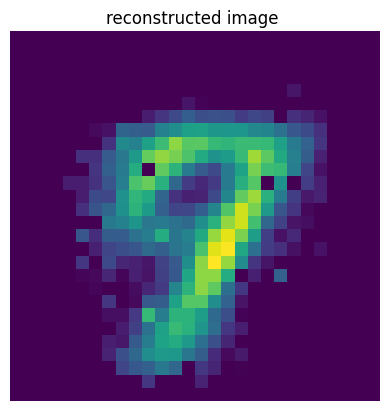

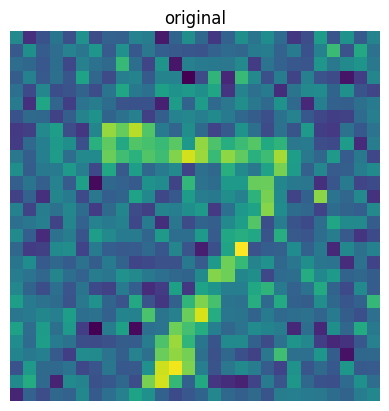

1/1 [==============================] - 0s 48ms/step


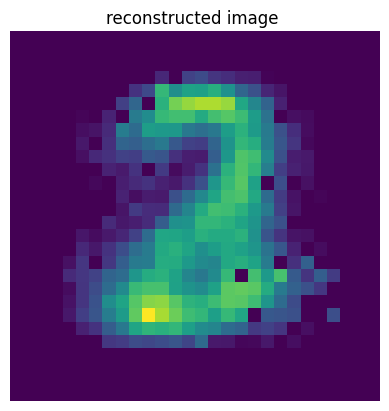

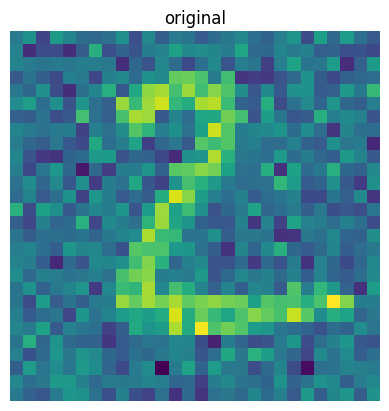

1/1 [==============================] - 0s 64ms/step


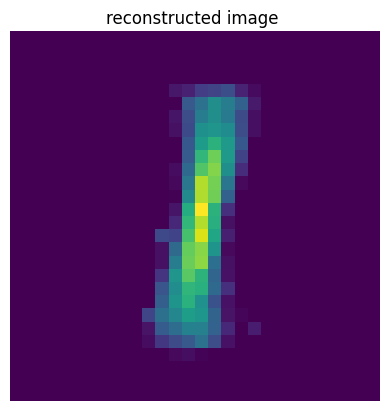

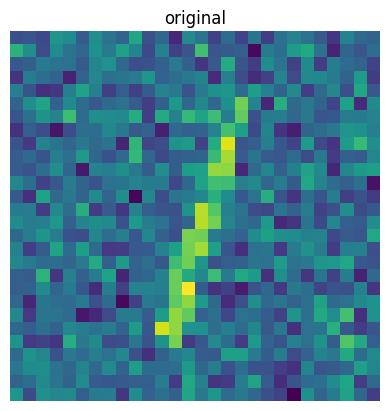

1/1 [==============================] - 0s 47ms/step


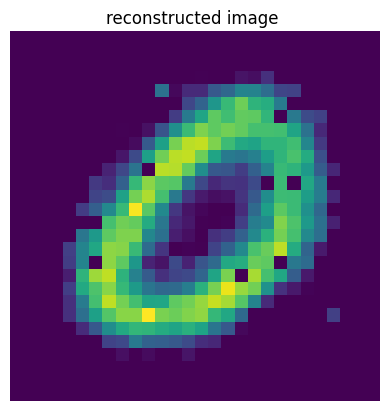

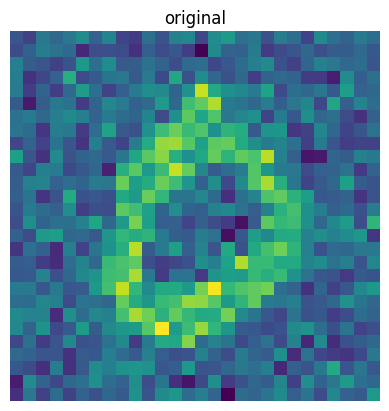

1/1 [==============================] - 0s 59ms/step


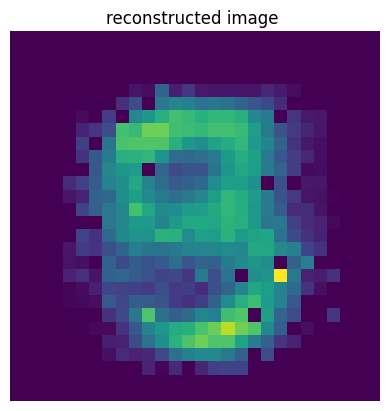

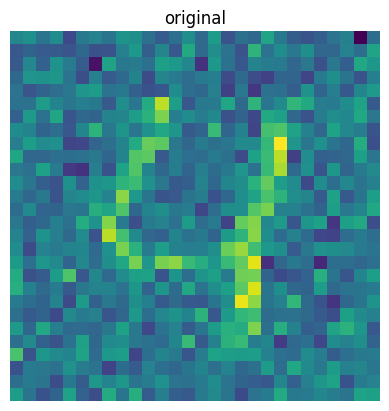

1/1 [==============================] - 0s 55ms/step


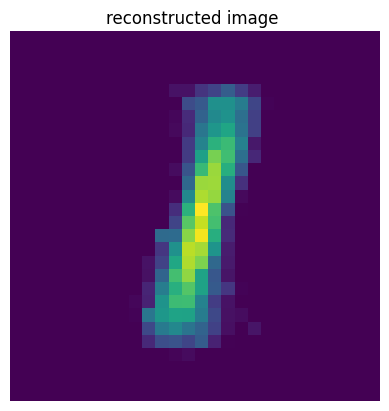

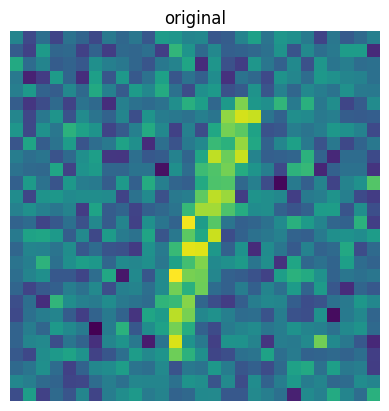

1/1 [==============================] - 0s 68ms/step


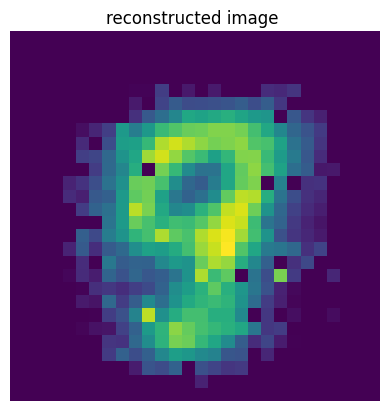

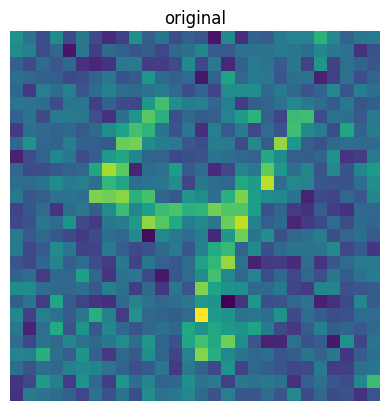

1/1 [==============================] - 0s 68ms/step


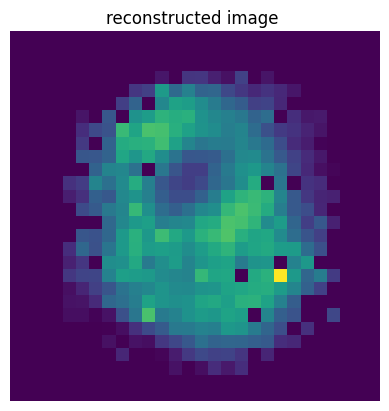

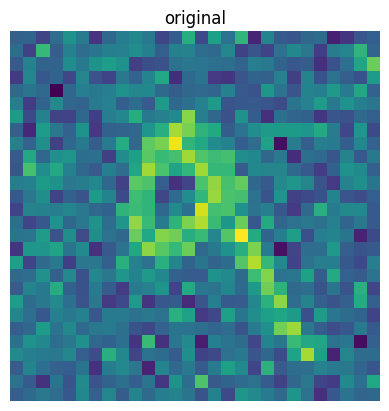

1/1 [==============================] - 0s 167ms/step


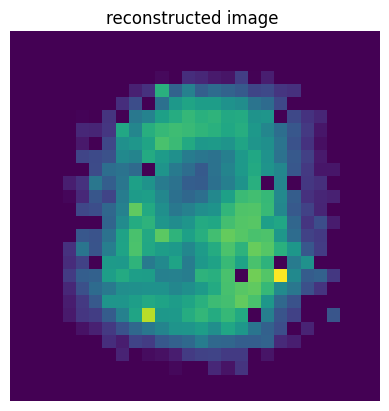

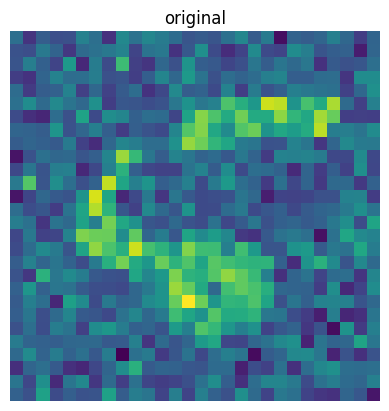

1/1 [==============================] - 0s 58ms/step


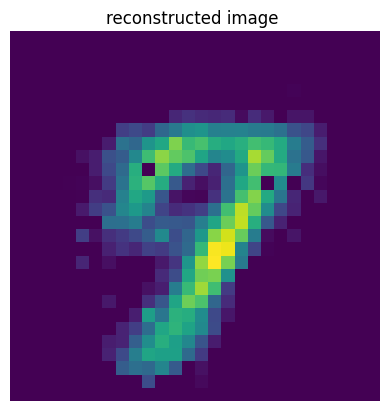

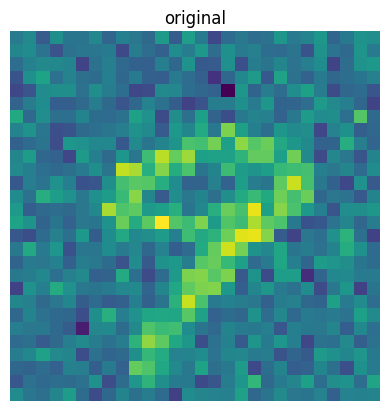

In [26]:
#after training the model lets see the final outputs of the model

#we need to reshape in. the predict part also because the
#it expects a batch of data but we are giving it one at a time


for i in range(10):
  sample = x_test_noise[i].reshape(1, 28, 28)
  z=den_autoencoder.predict(sample)
  z=z.reshape(28,28)
  plt.imshow(z)
  plt.title('reconstructed image ')
  plt.axis("off")
  plt.show()

  #now lets print the original image
  plt.imshow(x_test_noise[i])
  plt.title("original")
  plt.axis("off")
  plt.show()